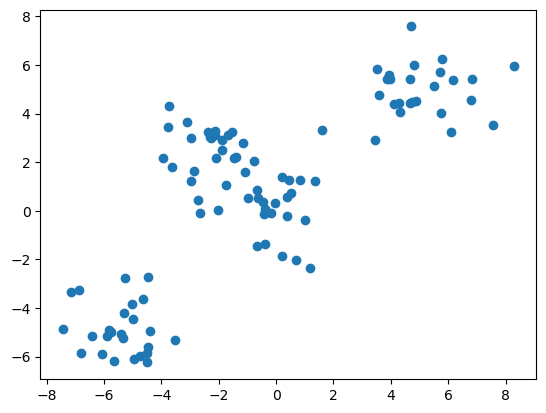

In [266]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

centroids = [(-5, -5),(0,0),(5, 5),(-2.5,2.5)]
cluster_std = [1, 1,1,1]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, 
                  n_features=2, random_state=2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [267]:
class KMeans:
    def __init__(self,n_clusters):
        self.n_clusters=n_clusters
    def elbow_graph(self,X):
        wcss=[]
        rows = X.shape[0]
        for i in range(1,21):
            random_index=[]
            for j in range(1,i+1):
                random_index.append(np.random.randint(0, rows))
            distances = cdist(X, X[random_index], metric='euclidean')
            row_mins = np.min(distances, axis=1)
            wcss.append(np.sum(row_mins**2))
        plt.plot(range(1,21),wcss)
        plt.xticks(range(1, 21))
    def fit(self,X):
        random_index=[]
        centorids=[]
        rows = X.shape[0]
        for j in range(1,self.n_clusters+1):
                random_index.append(np.random.randint(0, rows))
        centroids=X[random_index]
        for i in range(0,10):
            distances = cdist(X, centroids, metric='euclidean')
            min_indices = np.argmin(distances, axis=1)
            cluster_type=np.unique(min_indices)
            cen=[]
            for type_ in cluster_type:
                cen.append(X[min_indices==type_].mean(axis=0))
            centroids=cen
        return min_indices
        

In [268]:
k=KMeans(4)

This is the elbow code part from which we can see how many clusters the data have.

In [269]:
y_means=k.fit(X)

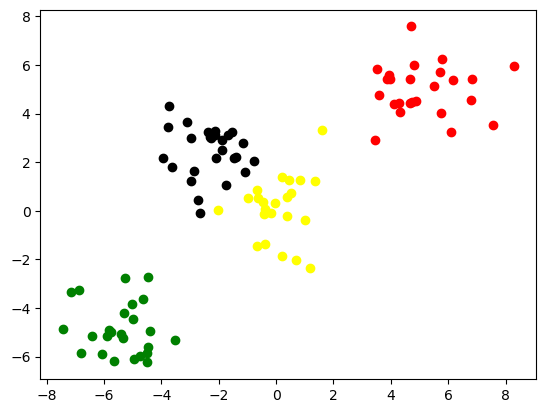

In [270]:
plt.scatter(X[y_means ==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means ==1,0],X[y_means==1,1],color='black')
plt.scatter(X[y_means ==2,0],X[y_means==2,1],color='yellow')
plt.scatter(X[y_means ==3,0],X[y_means==3,1],color='green')

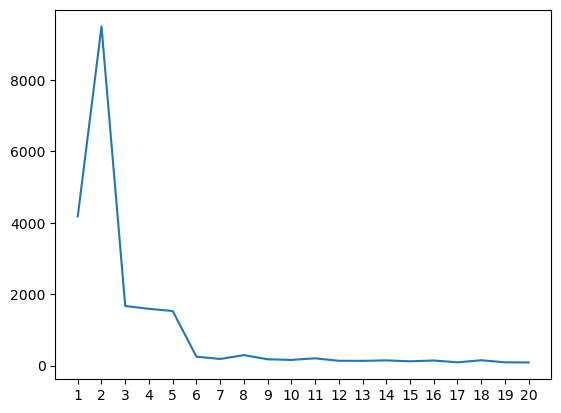

In [260]:
k.elbow_graph(X)